In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
from sklearn import metrics

In [295]:
# Reading the dataset
df=pd.read_csv(r'/home/vidhyasaghar/Downloads/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv')
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [297]:
df.shape

(9240, 37)

In [298]:
#Finding out the NULL columns in the dataset
df.head()
df_temp1 = df.replace('Select', np.nan)
round(100*(df_temp1.isnull().sum()/len(df_temp1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [299]:
#Removing columns which have more than 50% NULL values
df_temp1 = df_temp1.drop(df_temp1.loc[:,list(round(df_temp1.isnull().sum()/df_temp1.shape[0], 2)>0.50)].columns, 1)

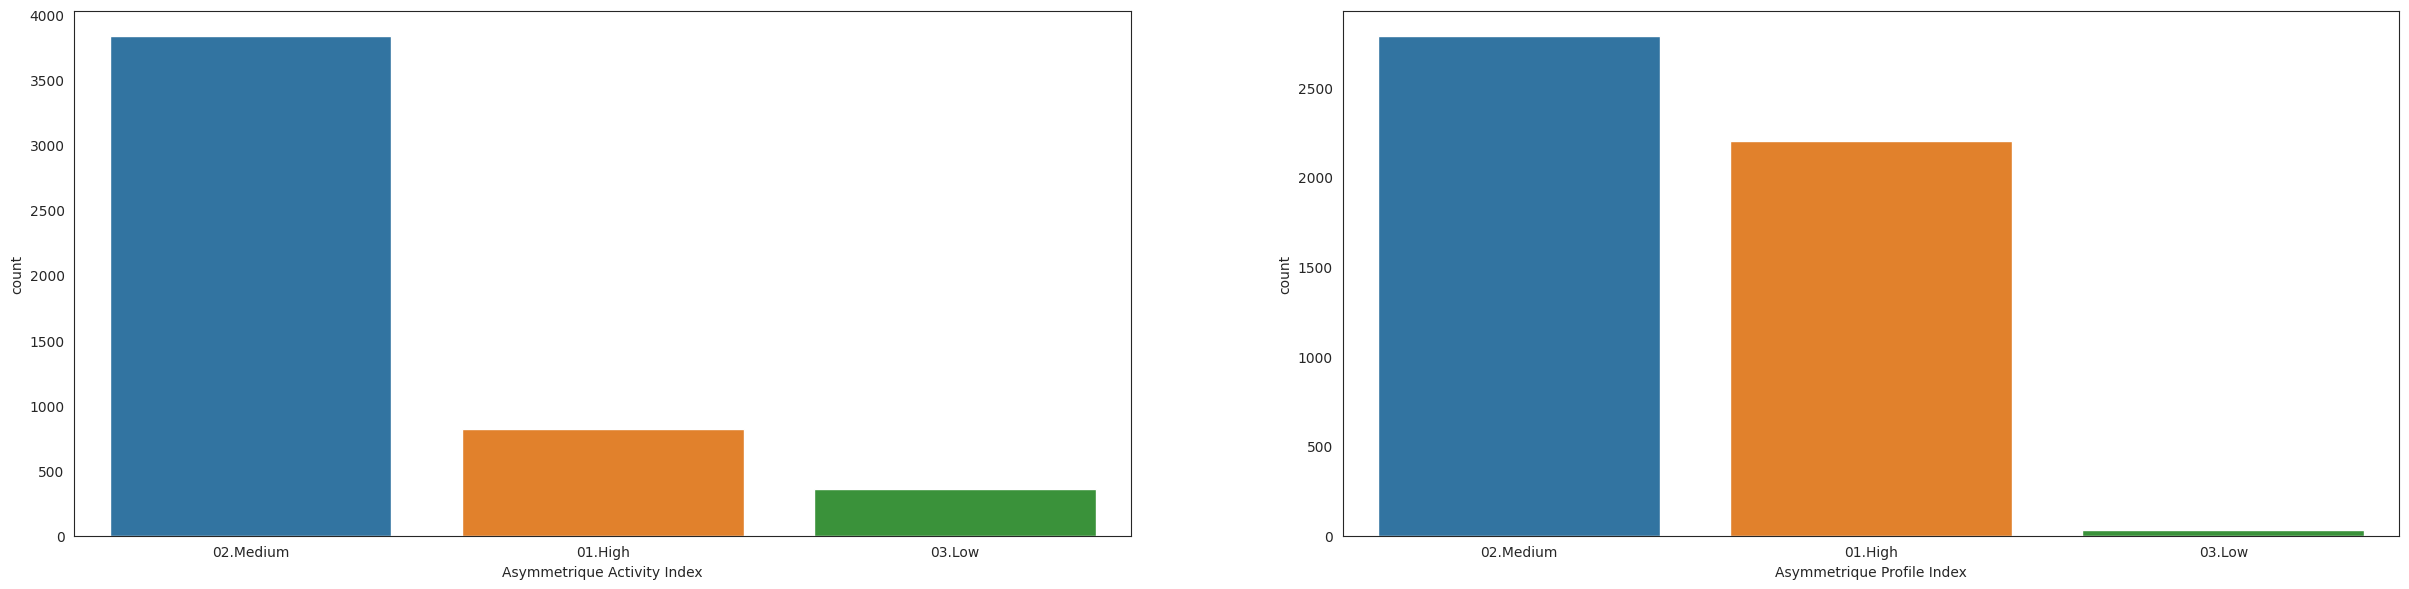

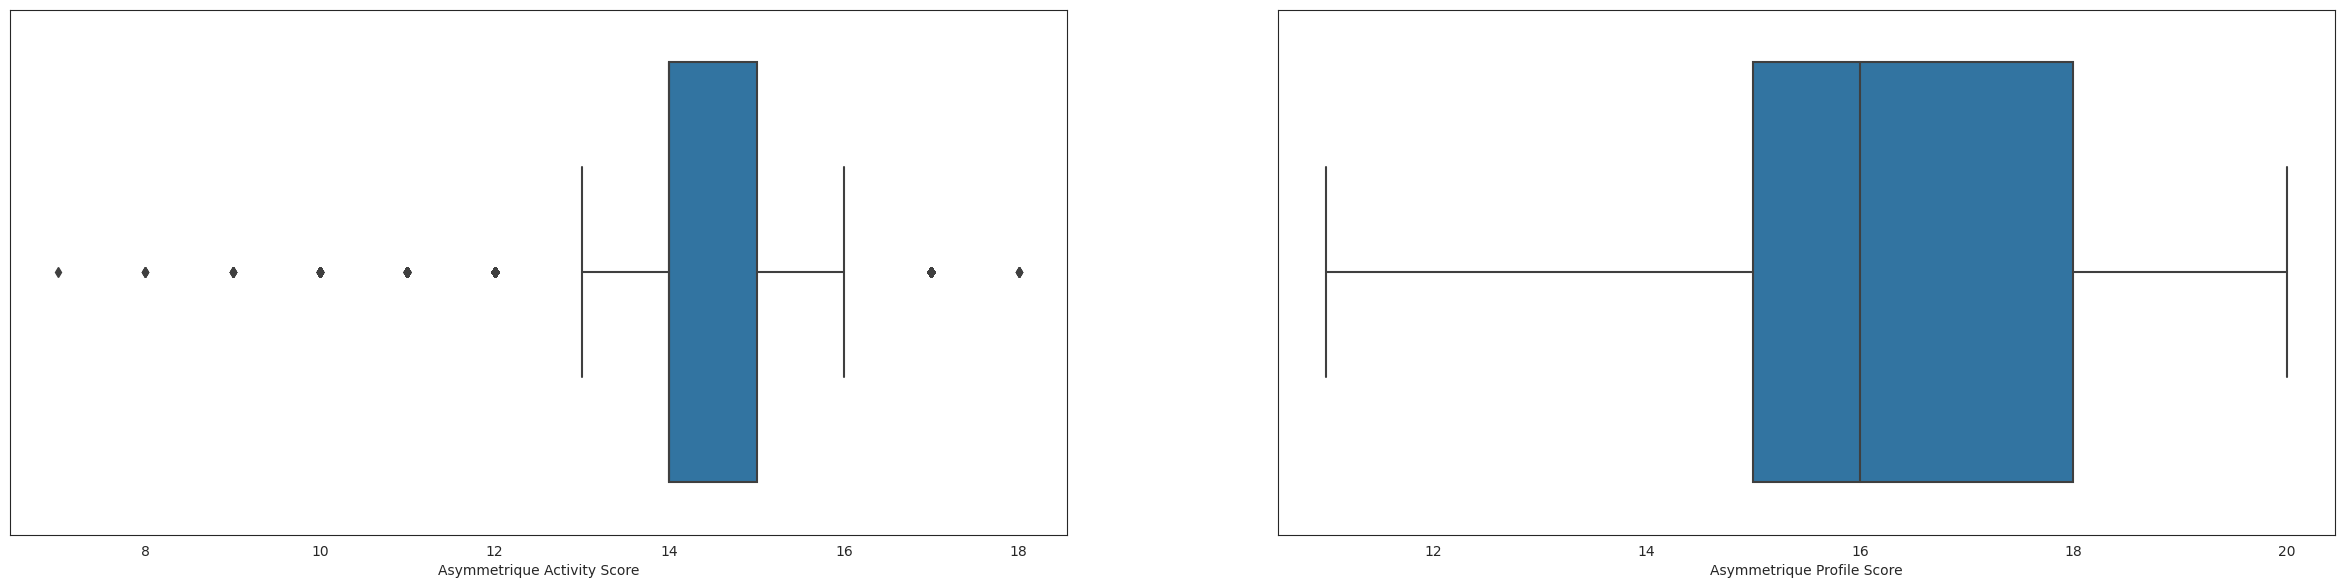

In [300]:
#Finding out if the below columns are significant 
plt.figure(figsize=(30, 15))
plt.subplot(2,2,1)
sns.countplot(x ='Asymmetrique Activity Index', data = df)
plt.subplot(2,2,2)
sns.countplot(x='Asymmetrique Profile Index', data = df)
plt.figure(figsize=(30, 15))
plt.subplot(2,2,1)
sns.boxplot(x=df['Asymmetrique Activity Score'])
plt.subplot(2,2,2)
sns.boxplot(x=df['Asymmetrique Profile Score'])
plt.show()

In [301]:
#Dropping them as we dont need them
df_temp2 = df_temp1.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1)
round(100*(df_temp2.isnull().sum()/len(df_temp2.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

<Axes: >

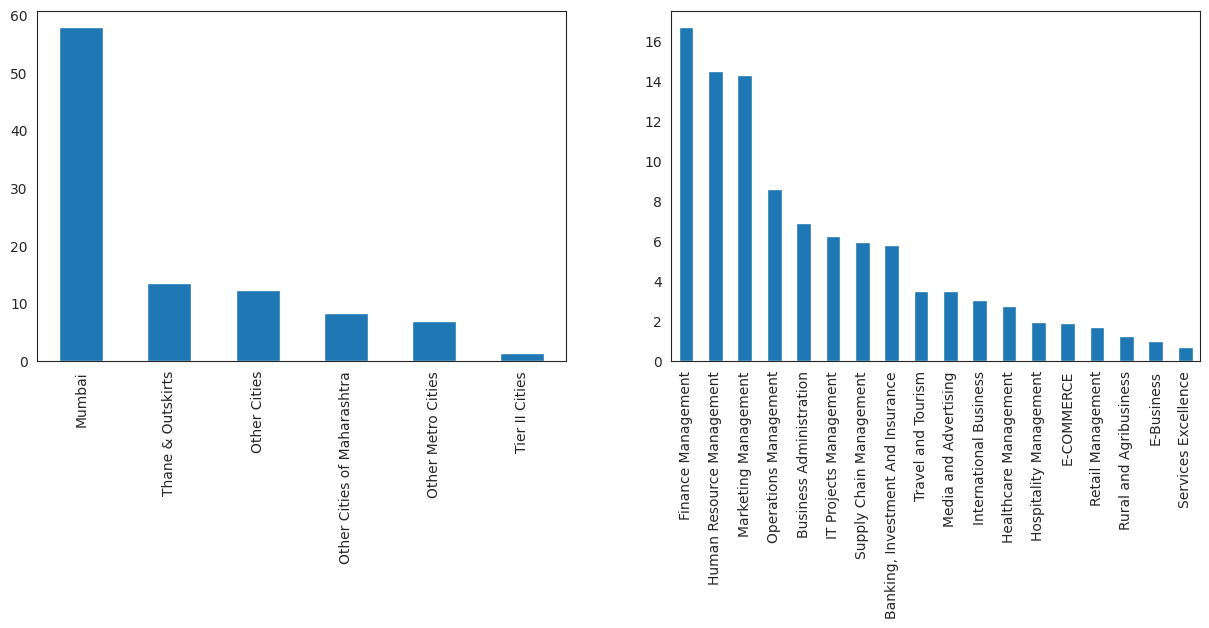

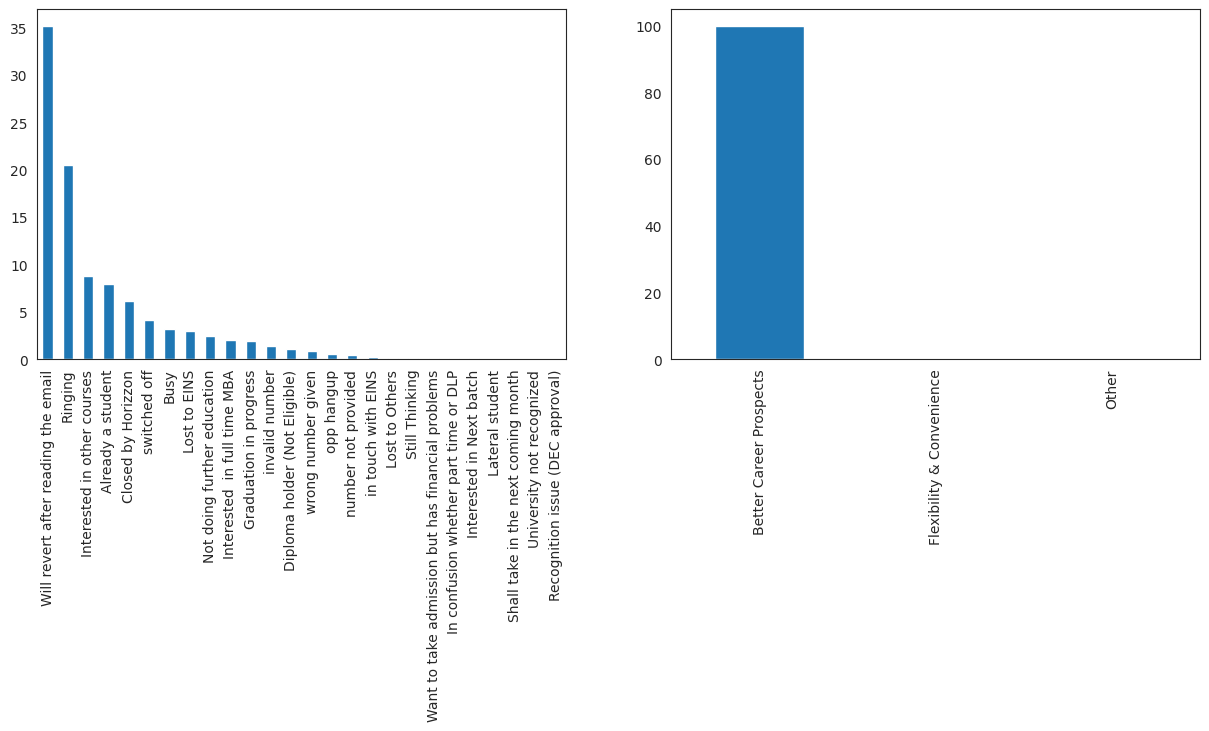

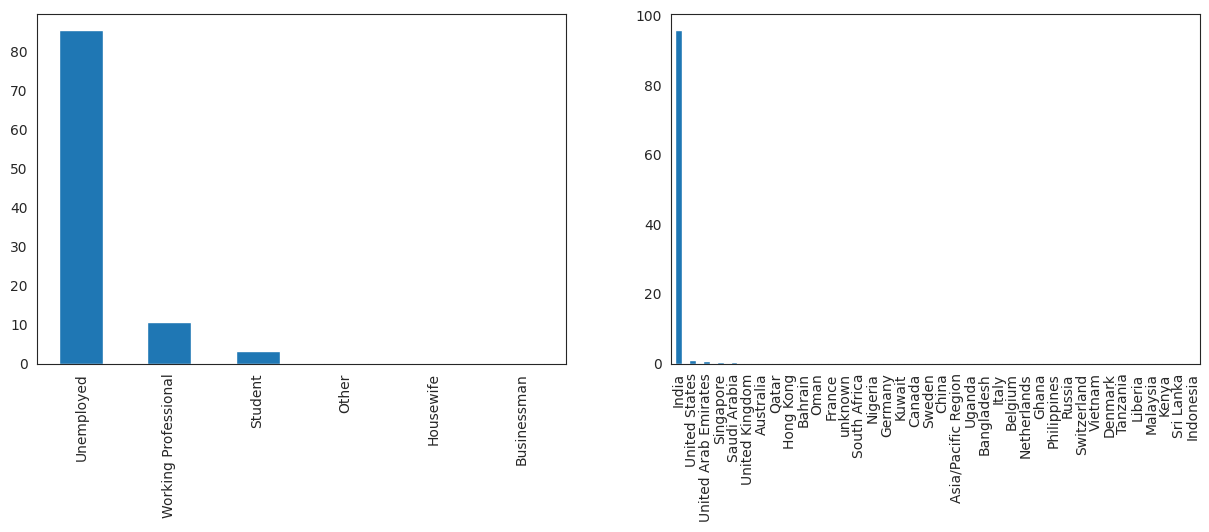

In [302]:
#Analysing the columns to see what values can be imputed to them
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
pltVal = (df_temp2['City'].value_counts(normalize=True)*100)
pltVal.plot.bar()
plt.subplot(2,2,2)
pltVal = (df_temp2['Specialization'].value_counts(normalize=True)*100)
pltVal.plot.bar()
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
pltVal = (df_temp2['Tags'].value_counts(normalize=True)*100)
pltVal.plot.bar()
plt.subplot(2,2,2)
pltVal = (df_temp2['What matters most to you in choosing a course'].value_counts(normalize=True)*100)
pltVal.plot.bar()
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
pltVal = (df_temp2['What is your current occupation'].value_counts(normalize=True)*100)
pltVal.plot.bar()
plt.subplot(2,2,2)
pltVal = (df_temp2['Country'].value_counts(normalize=True)*100)
pltVal.plot.bar()

In [303]:
df_temp2['Tags'] = df_temp2['Tags'].replace(np.nan, df_temp2['Tags'].describe()['top'])
df_temp2['What matters most to you in choosing a course'] = df_temp2['What matters most to you in choosing a course'].replace(np.nan, df_temp2['What matters most to you in choosing a course'].describe()['top'])
df_temp2['What is your current occupation'] = df_temp2['What is your current occupation'].replace(np.nan, df_temp2['What is your current occupation'].describe()['top'])
df_temp2['Country'] = df_temp2['Country'].replace(np.nan, df_temp2['Country'].describe()['top'])

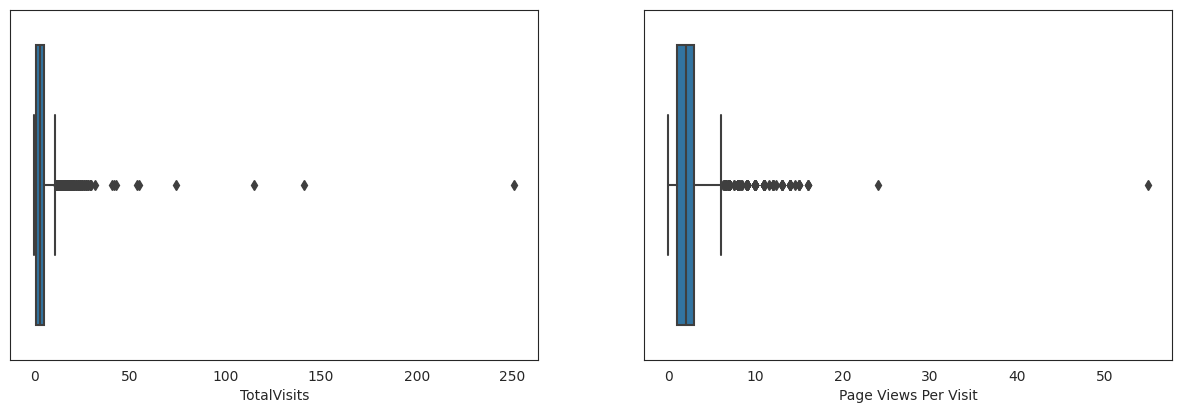

<Axes: >

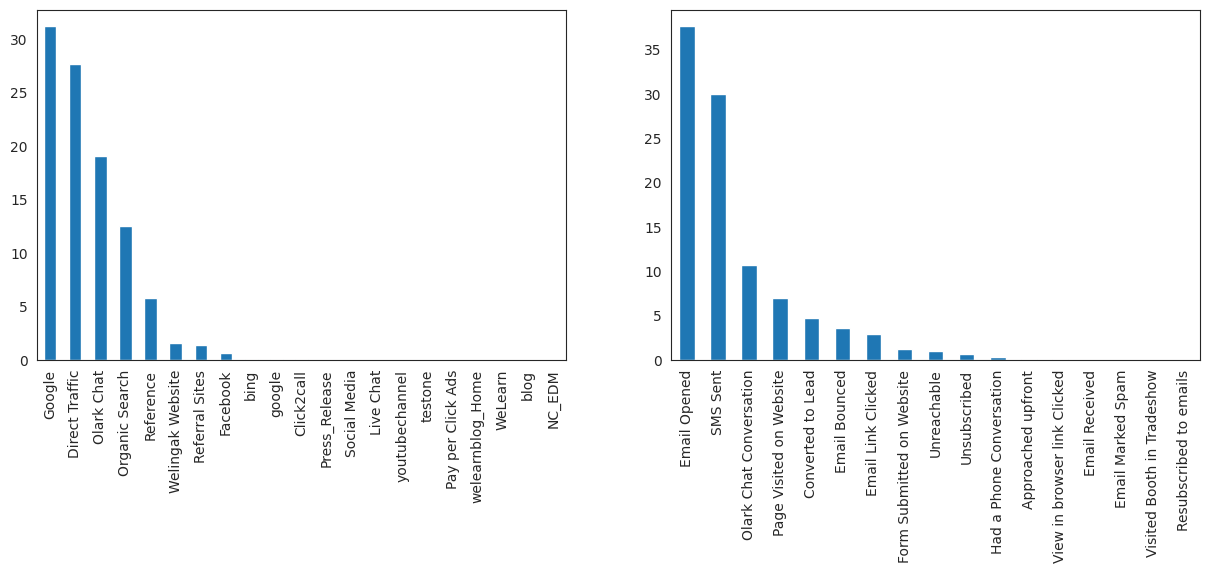

In [304]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.boxplot(x=df_temp2['TotalVisits'])
plt.subplot(2,2,2)
sns.boxplot(x=df_temp2['Page Views Per Visit'])
plt.show()
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
pltVal = (df_temp2['Lead Source'].value_counts(normalize=True)*100)
pltVal.plot.bar()
plt.subplot(2,2,2)
pltVal = (df_temp2['Last Activity'].value_counts(normalize=True)*100)
pltVal.plot.bar()

In [305]:
df_temp3=df_temp2.dropna()
#Correcting the mistake in Lead Source column
df_temp3['Lead Source'] = df_temp3['Lead Source'].replace(['google'], 'Google')

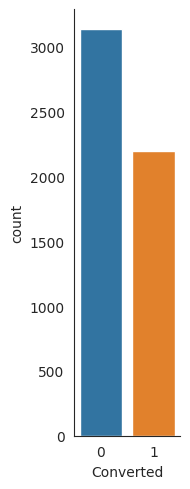

In [306]:
#Checking conversion rate of the dataset
sns.catplot(x="Converted", kind="count", data=df_temp3, aspect= 0.4);

In [307]:
round(100*(df_temp3.isnull().sum()/len(df_temp3.index)), 2)
#Now the data is rid of NULL values we can check for outliers

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

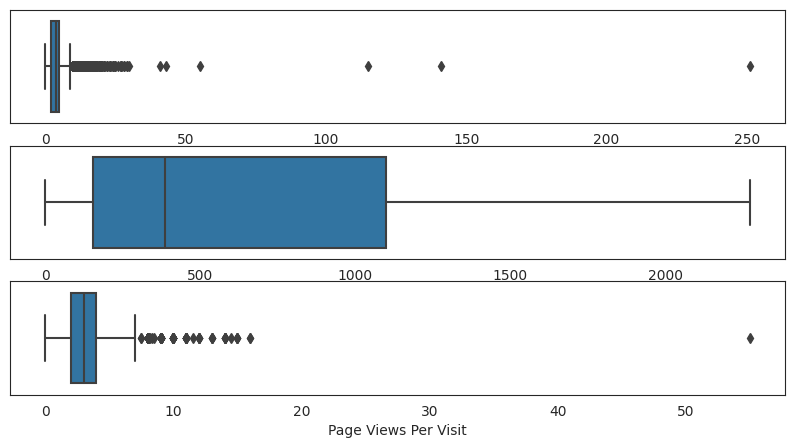

In [308]:
plt.figure(figsize=(10, 5))
plt.subplot(3,1,1)
sns.boxplot(x=df_temp3['TotalVisits'])
plt.subplot(3,1,2)
sns.boxplot(x=df_temp3['Total Time Spent on Website'])
plt.subplot(3,1,3)
sns.boxplot(x=df_temp3['Page Views Per Visit'])
plt.show()
#There are many outliers here and we need to removed them to have a clean model

In [309]:
boud_val = df_temp3['TotalVisits'].quantile([0.90]).values
df_temp3['TotalVisits'][df_temp3['TotalVisits'] >= boud_val[0]] = boud_val[0]
# We remove the outlying values and take the rest
boud_val = df_temp3['Page Views Per Visit'].quantile([0.90]).values
df_temp3['Page Views Per Visit'][df_temp3['Page Views Per Visit'] >= boud_val[0]] = boud_val[0]

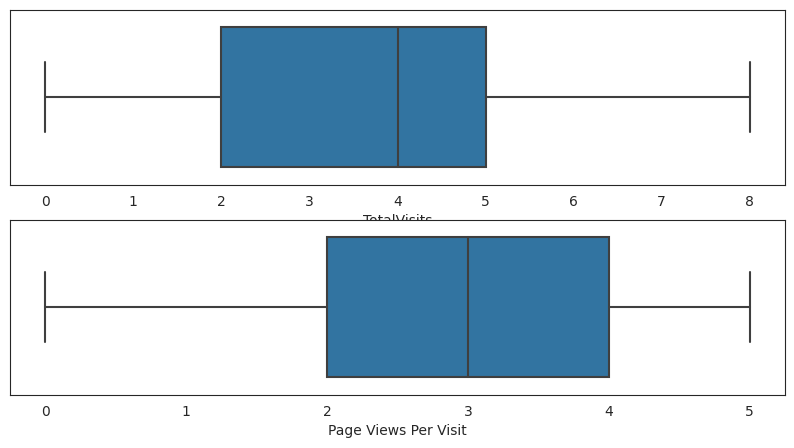

In [310]:
plt.figure(figsize=(10, 5))
plt.subplot(2,1,1)
sns.boxplot(x=df_temp3['TotalVisits'])
plt.subplot(2,1,2)
sns.boxplot(x=df_temp3['Page Views Per Visit'])
plt.show()

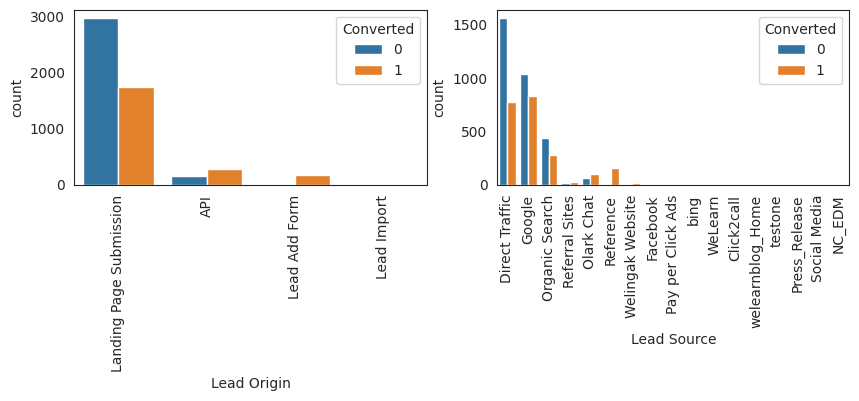

In [311]:
plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = df_temp3)
plt.xticks(rotation = 90)
plt.subplot(2,2,2)
sns.countplot(x = "Lead Source", hue = "Converted", data = df_temp3)
plt.xticks(rotation = 90)
plt.show()

In [312]:
df_temp3['Lead Source'].value_counts(normalize = True, dropna = False) * 100
#As it can be seen from the graph, number of leads generated by many of the sources are negligible. 
#There are sufficient numbers till Facebook. 
#We can convert all others in one single category of 'Others'.

Direct Traffic       43.833302
Google               35.085414
Organic Search       13.553595
Reference             3.116200
Olark Chat            3.041111
Referral Sites        0.600713
Facebook              0.262812
Welingak Website      0.244040
Click2call            0.075089
bing                  0.037545
Press_Release         0.037545
testone               0.018772
Social Media          0.018772
Pay per Click Ads     0.018772
welearnblog_Home      0.018772
WeLearn               0.018772
NC_EDM                0.018772
Name: Lead Source, dtype: float64

In [313]:
df_temp3['Do Not Email'].value_counts(normalize = True, dropna = False) * 100


No     90.951755
Yes     9.048245
Name: Do Not Email, dtype: float64

In [314]:
df_temp3['Do Not Call'].value_counts(normalize = True, dropna = False) * 100
#As one can expect, most of the responses are 'No' for both Do not vall and Email
#the variables which generated most of the leads.

No     99.962455
Yes     0.037545
Name: Do Not Call, dtype: float64

In [315]:
df_temp3['Last Activity'].value_counts(normalize = True, dropna = False) * 100
#Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. 
#We can consolidate most of the values to Others

Email Opened                    41.787122
SMS Sent                        31.762718
Page Visited on Website          8.747888
Converted to Lead                4.599212
Email Bounced                    3.660597
Email Link Clicked               2.515487
Olark Chat Conversation          2.215130
Form Submitted on Website        2.121269
Unreachable                      1.295288
Unsubscribed                     0.788436
Had a Phone Conversation         0.337901
Approached upfront               0.056317
View in browser link Clicked     0.037545
Email Received                   0.037545
Visited Booth in Tradeshow       0.018772
Email Marked Spam                0.018772
Name: Last Activity, dtype: float64

In [316]:
df_temp3['Country'].value_counts(normalize = True, dropna = False) * 100
#Most of the responses are for India. Others are not significant.

India                   95.795007
United States            0.919842
United Arab Emirates     0.825981
Saudi Arabia             0.375446
Singapore                0.319129
United Kingdom           0.225268
Australia                0.206495
Qatar                    0.150178
Bahrain                  0.131406
Hong Kong                0.112634
France                   0.112634
Oman                     0.093861
Kuwait                   0.075089
Germany                  0.075089
Nigeria                  0.075089
Canada                   0.056317
South Africa             0.056317
Belgium                  0.037545
Bangladesh               0.037545
Philippines              0.037545
Netherlands              0.037545
Liberia                  0.018772
Vietnam                  0.018772
Denmark                  0.018772
Switzerland              0.018772
Italy                    0.018772
Tanzania                 0.018772
Malaysia                 0.018772
Kenya                    0.018772
Sweden        

In [317]:
df_temp3['Specialization'].value_counts(normalize = True, dropna = False) * 100
#Conversion rates are mostly similar across different specializations.
#Only the top management gets most interest

Finance Management                   17.139103
Human Resource Management            14.079219
Marketing Management                 13.065515
Operations Management                 8.503848
Business Administration               6.682936
IT Projects Management                6.664164
Supply Chain Management               6.025906
Banking, Investment And Insurance     5.706777
Travel and Tourism                    3.716914
Media and Advertising                 3.679369
International Business                3.153745
Healthcare Management                 2.665665
E-COMMERCE                            2.064952
Hospitality Management                1.952318
Retail Management                     1.783368
Rural and Agribusiness                1.295288
E-Business                            1.070021
Services Excellence                   0.750892
Name: Specialization, dtype: float64

In [318]:
df_temp3['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100
#The highest conversion rate is for 'Working Professional'. 
#High number of leads are generated for 'Unemployed' but conversion rate is low.

Unemployed              89.449972
Working Professional     7.959452
Student                  2.158814
Other                    0.206495
Housewife                0.168951
Businessman              0.056317
Name: What is your current occupation, dtype: float64

In [319]:
df_temp3['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100
#Variable 'What matters most to you in choosing a course' has only one category with significant count.
#So we will remove this

Better Career Prospects      99.962455
Flexibility & Convenience     0.018772
Other                         0.018772
Name: What matters most to you in choosing a course, dtype: float64

In [320]:
df_temp3['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100

Better Career Prospects      99.962455
Flexibility & Convenience     0.018772
Other                         0.018772
Name: What matters most to you in choosing a course, dtype: float64

In [321]:
df_temp3['Search'].value_counts(normalize = True, dropna = False) * 100

No     99.887366
Yes     0.112634
Name: Search, dtype: float64

In [322]:
df_temp3['Magazine'].value_counts(normalize = True, dropna = False) * 100

No    100.0
Name: Magazine, dtype: float64

In [323]:
df_temp3['Newspaper Article'].value_counts(normalize = True, dropna = False) * 100

No     99.981228
Yes     0.018772
Name: Newspaper Article, dtype: float64

In [324]:
df_temp3['X Education Forums'].value_counts(normalize = True, dropna = False) * 100

No     99.981228
Yes     0.018772
Name: X Education Forums, dtype: float64

In [325]:
df_temp3['Newspaper'].value_counts(normalize = True, dropna = False) * 100

No    100.0
Name: Newspaper, dtype: float64

In [326]:
df_temp3['Digital Advertisement'].value_counts(normalize = True, dropna = False) * 100

No     99.981228
Yes     0.018772
Name: Digital Advertisement, dtype: float64

In [327]:
df_temp3['Through Recommendations'].value_counts(normalize = True, dropna = False) * 100

No     99.887366
Yes     0.112634
Name: Through Recommendations, dtype: float64

In [328]:
df_temp3['Receive More Updates About Our Courses'].value_counts(normalize = True, dropna = False) * 100
#As all the above variables(Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, and Receive More Updates About Our Courses) have most of the values as no, nothing significant can be inferred from these values
#All these can be removed

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [329]:
df_temp3['Tags'].value_counts(normalize = True, dropna = False) * 100
#In Tags, categories after 'Interested in full time MBA' have very few leads generated, we can combine them to other category

Will revert after reading the email                  53.632439
Ringing                                              15.862587
Already a student                                     5.237469
Interested in other courses                           4.355172
Closed by Horizzon                                    3.829548
switched off                                          3.341468
Busy                                                  2.703210
Lost to EINS                                          2.365309
Not doing further education                           1.971091
Interested  in full time MBA                          1.351605
Graduation in progress                                1.295288
invalid number                                        1.238971
Diploma holder (Not Eligible)                         0.732119
wrong number given                                    0.675803
opp hangup                                            0.450535
number not provided                                   0

In [330]:
df_temp3['Update me on Supply Chain Content'].value_counts(normalize = True, dropna = False) * 100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [331]:
df_temp3['Get updates on DM Content'].value_counts(normalize = True, dropna = False) * 100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [332]:
df_temp3['City'].value_counts(normalize = True, dropna = False) * 100

Mumbai                         57.987610
Thane & Outskirts              13.403417
Other Cities                   12.258307
Other Cities of Maharashtra     7.978224
Other Metro Cities              6.983293
Tier II Cities                  1.389150
Name: City, dtype: float64

In [333]:
df_temp3['I agree to pay the amount through cheque'].value_counts(normalize = True, dropna = False) * 100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [334]:
df_temp3['A free copy of Mastering The Interview'].value_counts(normalize = True, dropna = False) * 100

Yes    54.082974
No     45.917026
Name: A free copy of Mastering The Interview, dtype: float64

In [335]:
df_temp3['Last Notable Activity'].value_counts(normalize = True, dropna = False) * 100
#Values from the Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque and  A free copy of Mastering The Interview are all insignificant, they will be removed
#In 'Last Notable Activity', we can combine categories after the top 3 and consolidate all in other category.

Email Opened                    35.254365
Modified                        31.049371
SMS Sent                        25.286277
Page Visited on Website          4.186221
Email Link Clicked               1.670734
Olark Chat Conversation          0.638258
Unsubscribed                     0.600713
Email Bounced                    0.544396
Unreachable                      0.450535
Had a Phone Conversation         0.225268
Approached upfront               0.018772
View in browser link Clicked     0.018772
Form Submitted on Website        0.018772
Email Received                   0.018772
Email Marked Spam                0.018772
Name: Last Notable Activity, dtype: float64

In [432]:
df_mdl_v1 = df_temp3.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],axis=1)
df_mdl_v1 =df_mdl_v1.drop(['Prospect ID','Lead Number'],axis=1)
uniq_category = df_mdl_v1['Last Notable Activity'].unique()
df_mdl_v1['Last Notable Activity'] = df_mdl_v1['Last Notable Activity'].replace(uniq_category[-6:], 'Others')
uniq_category = df_mdl_v1['Tags'].unique()
df_mdl_v1['Tags'] = df_mdl_v1['Tags'].replace(uniq_category[-10:], 'Others')
uniq_category = df_mdl_v1['Last Activity'].unique()
df_mdl_v1['Last Activity'] = df_mdl_v1['Last Activity'].replace(uniq_category[-5:], 'Others')
uniq_category = df_mdl_v1['Lead Source'].unique()
df_mdl_v1['Lead Source'] = df_mdl_v1['Lead Source'].replace(uniq_category[8:], 'Others')

In [433]:
round(100*(df_mdl_v1.isnull().sum()/len(df_mdl_v1.index)), 2)

Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Last Activity                      0.0
Specialization                     0.0
What is your current occupation    0.0
Tags                               0.0
City                               0.0
Last Notable Activity              0.0
dtype: float64

In [434]:
df_mdl_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5327 entries, 2 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      5327 non-null   object 
 1   Lead Source                      5327 non-null   object 
 2   Do Not Email                     5327 non-null   object 
 3   Converted                        5327 non-null   int64  
 4   TotalVisits                      5327 non-null   float64
 5   Total Time Spent on Website      5327 non-null   int64  
 6   Page Views Per Visit             5327 non-null   float64
 7   Last Activity                    5327 non-null   object 
 8   Specialization                   5327 non-null   object 
 9   What is your current occupation  5327 non-null   object 
 10  Tags                             5327 non-null   object 
 11  City                             5327 non-null   object 
 12  Last Notable Activit

In [435]:
df_mdl_v1.columns[df_mdl_v1.dtypes == 'object']

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [436]:
#We will split the categorical values to dummy values
df_mdl_v2=pd.get_dummies(df_mdl_v1,columns =[ 'Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Specialization', 'What is your current occupation','Tags', 'City', 'Last Notable Activity'],drop_first=True)

In [437]:
#Final Dataframe
df_mdl_v2.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,1,2.0,1640,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,2.0,71,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
9,0,4.0,58,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [515]:
#Model Building can begin now
df_mdl_train_v1, df_mdl_test_v1 = train_test_split(df_mdl_v2, train_size = 0.7, test_size = 0.3, random_state = 100)
scl=MinMaxScaler()
#We will scale the numerical values
Scl_param=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df_mdl_train_v1[Scl_param] = scl.fit_transform(df_mdl_train_v1[Scl_param])

In [516]:
y_train_v1 = df_mdl_train_v1.pop('Converted')
X_train_v1 = df_mdl_train_v1

In [517]:
X_train_v1 = sm.add_constant(X_train_v1)    
mdl_rslt_v1 = sm.GLM(y_train_v1,X_train_v1, family = sm.families.Binomial())
mdl_rslt_v1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3728
Model:                            GLM   Df Residuals:                     3651
Model Family:                Binomial   Df Model:                           76
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -975.70
Date:                Mon, 13 Mar 2023   Deviance:                       1951.4
Time:                        00:04:03   Pearson chi2:                 8.31e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5636
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -25.8146   7.93e+04     -0.000      1.000   -1.55e+05    1.55e+05
TotalVisits                                              0.7108      0.285      2.497      0.013       0.153       1.269
Total Time Spent on Website                              4.4997      0.265     16.976      0.000       3.980       5.019
Page Views Per Visit                                    -1.0846      0.301     -3.605      0.000      -1.674      -0.495
Lead Origin_Landing Page Submission                     -0.8315      0.272     -3.051      0.002      -1.366      -0.297
Lead Origin_Lead Add Form                               23.3502   4.28e+04      0.001      1.000   -8.39e+04     8.4e+04
Lead Origin_Lead Import                                  1.3765      0.533      2.583      0.010       0.332       2.421
Lead Source_Facebook                                     1.3765      0.533      2.583      0.010       0.332       2.421
Lead Source_Google                                       0.2389      0.139      1.722      0.085      -0.033       0.511
Lead Source_Olark Chat                                   0.7341      0.418      1.754      0.079      -0.086       1.554
Lead Source_Organic Search                               0.4395      0.204      2.151      0.031       0.039       0.840
Lead Source_Others                                       0.2943      1.601      0.184      0.854      -2.844       3.432
Lead Source_Reference                                  -20.0349   4.28e+04     -0.000      1.000    -8.4e+04    8.39e+04
Lead Source_Referral Sites                               0.7226      0.694      1.041      0.298      -0.638       2.083
Lead Source_Welingak Website                            -0.0352    4.8e+04  -7.33e-07      1.000   -9.42e+04    9.42e+04
Do Not Email_Yes                                        -1.2754      0.339     -3.764      0.000      -1.940      -0.611
Last Activity_Email Bounced                             -1.1834      0.859     -1.378      0.168      -2.866       0.499
Last Activity_Email Link Clicked                         0.8088      0.863      0.937      0.349      -0.883       2.501
Last Activity_Email Opened                               0.3748      0.419      0.895      0.371      -0.446       1.196
Last Activity_Form Submitted on Website                 -0.5604      0.565     -0.992      0.321      -1.668       0.547
Last Activity_Had a Phone Conversation                   0.0261      2.395      0.011      0.991      -4.668       4.721
Last Activity_Olark Chat Conversation                   -0.5465      0.715     -0.764      0.445      -1.948       0.855
Last Activity_Others                                     0

In [518]:
Logis_Reg = LogisticRegression()

In [519]:
#We have to perform RFE to find the optimal attributed for the model
mdl_rfe = RFE(Logis_Reg, step=13)    
mdl_rfe = mdl_rfe.fit(X_train_v1, y_train_v1)

In [520]:
list(zip(X_train_v1.columns, mdl_rfe.support_, mdl_rfe.ranking_))
#Below are the feature selected
rfe_col = X_train_v1.columns[mdl_rfe.support_]
X_train_v1.columns[mdl_rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Unreachable',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch wit

In [521]:
#Running the model first time after RFE
X_train_v2 = sm.add_constant(X_train_v1[rfe_col])
mdl_rslt_v2 = sm.GLM(y_train_v1,X_train_v2, family = sm.families.Binomial())
mdl_rslt_v2 = mdl_rslt_v2.fit()
mdl_rslt_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3728
Model:                            GLM   Df Residuals:                     3689
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -993.69
Date:                Mon, 13 Mar 2023   Deviance:                       1987.4
Time:                        00:04:05   Pearson chi2:                 6.74e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5594
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0055      0.667     -1.509      0.131      -2.312       0.301
TotalVisits                                              0.8168      0.271      3.009      0.003       0.285       1.349
Total Time Spent on Website                              4.4380      0.259     17.130      0.000       3.930       4.946
Page Views Per Visit                                    -0.9436      0.283     -3.328      0.001      -1.499      -0.388
Lead Origin_Landing Page Submission                     -1.1431      0.208     -5.501      0.000      -1.550      -0.736
Lead Origin_Lead Add Form                               23.2457    4.3e+04      0.001      1.000   -8.43e+04    8.43e+04
Lead Origin_Lead Import                                  1.2596      0.528      2.386      0.017       0.225       2.294
Lead Source_Facebook                                     1.2596      0.528      2.386      0.017       0.225       2.294
Lead Source_Reference                                  -20.2084    4.3e+04     -0.000      1.000   -8.43e+04    8.43e+04
Lead Source_Welingak Website                            -0.3335   4.82e+04  -6.92e-06      1.000   -9.45e+04    9.45e+04
Do Not Email_Yes                                        -1.2391      0.322     -3.845      0.000      -1.871      -0.608
Last Activity_Email Bounced                             -0.9550      0.628     -1.520      0.129      -2.187       0.277
Last Activity_Form Submitted on Website                 -0.8309      0.474     -1.752      0.080      -1.760       0.098
Last Activity_Had a Phone Conversation                  -0.3320      2.253     -0.147      0.883      -4.748       4.084
Last Activity_Olark Chat Conversation                   -0.9815      0.628     -1.563      0.118      -2.212       0.249
Last Activity_Unreachable                                0.4841      0.560      0.865      0.387      -0.613       1.581
What is your current occupation_Housewife               21.6140   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Other                    1.3190      1.643      0.803      0.422      -1.902       4.539
What is your current occupation_Unemployed              -1.7830      0.467     -3.819      0.000      -2.698      -0.868
What is your current occupation_Working Professional     1.4307      0.573      2.498      0.013       0.308       2.553
Tags_Busy                                                3.4028      0.405      8.395      0.000       2.608       4.197
Tags_Closed by Horizzon                                  8.0094      1.073      7.467      0.000       5.907      10.112
Tags_Interested  in full time MBA                       -0

In [522]:
#The below column will be removed based on the R values
rfe_col = rfe_col.drop(['Lead Source_Welingak Website',                        
                        'Lead Origin_Lead Import','Lead Source_Facebook',
                        'Last Activity_Form Submitted on Website','Lead Origin_Lead Add Form',
                        'Last Activity_Email Bounced','What is your current occupation_Working Professional',
                        'What is your current occupation_Housewife','Lead Origin_Landing Page Submission'],1)

In [523]:
#We will check the VIF to be sure if we can remove any more columns
vif = pd.DataFrame()
vif['Features'] = X_train_v2[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_v2[rfe_col].values, i) for i in range(X_train_v2[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,TotalVisits,8.03
1,Total Time Spent on Website,2.59
2,Page Views Per Visit,10.10
3,Lead Source_Reference,1.32
4,Do Not Email_Yes,1.32
5,Last Activity_Had a Phone Conversation,3.28
6,Last Activity_Olark Chat Conversation,1.58
7,Last Activity_Unreachable,1.07
8,What is your current occupation_Other,1.02
9,What is your current occupation_Unemployed,8.98


In [524]:
#Based on VIF we will remove these values as well
rfe_col = rfe_col.drop(['Tags_Ringing'
                       ,'Last Notable Activity_Olark Chat Conversation','What is your current occupation_Other'
                       ,'What is your current occupation_Other'
                       ,'Tags_Interested in other courses','City_Tier II Cities'
                       ,'Last Notable Activity_Had a Phone Conversation','Tags_number not provided'
                       ,'Last Activity_Unreachable','Tags_switched off','Tags_invalid number','Tags_Not doing further education'
                       ,'What is your current occupation_Unemployed','Page Views Per Visit'
                       ,'Tags_Interested  in full time MBA','Tags_Closed by Horizzon','Tags_Will revert after reading the email'
                        ,'Last Notable Activity_Others','Total Time Spent on Website','Last Notable Activity_Unsubscribed','Tags_in touch with EINS'],1)

In [527]:
#Building the mode again after dropping columns
X_train_v3 = sm.add_constant(X_train_v2[rfe_col])
mdl_rslt_v3 = sm.GLM(y_train_v1,X_train_v3, family = sm.families.Binomial())
mdl_rslt_v3 = mdl_rslt_v3.fit()
mdl_rslt_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3728
Model:                            GLM   Df Residuals:                     3717
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2085.2
Date:                Mon, 13 Mar 2023   Deviance:                       4170.5
Time:                        00:04:10   Pearson chi2:                 3.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2086
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1924      0.102      1.894      0.058      -0.007       0.392
TotalVisits                                       0.6095      0.143      4.258      0.000       0.329       0.890
Lead Source_Reference                             4.6042      0.592      7.772      0.000       3.443       5.765
Do Not Email_Yes                                 -1.6580      0.186     -8.920      0.000      -2.022      -1.294
Last Activity_Had a Phone Conversation            1.5962      0.766      2.085      0.037       0.096       3.097
Last Activity_Olark Chat Conversation            -0.5654      0.301     -1.880      0.060      -1.155       0.024
Tags_Busy                                         0.9139      0.232      3.947      0.000       0.460       1.368
Tags_Lost to EINS                                 4.7837      0.719      6.649      0.000       3.374       6.194
Last Notable Activity_Email Opened               -1.1220      0.090    -12.492      0.000      -1.298      -0.946
Last Notable Activity_Modified                   -1.7249      0.103    -16.788      0.000      -1.926      -1.523
Last Notable Activity_Page Visited on Website    -1.6389      0.209     -7.853      0.000      -2.048      -1.230
=================================================================================================================
"""

In [528]:
# we see that the VIF also gives good results
vif = pd.DataFrame()
vif['Features'] = X_train_v3[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_v3[rfe_col].values, i) for i in range(X_train_v3[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,TotalVisits,2.32
1,Lead Source_Reference,1.06
2,Do Not Email_Yes,1.14
3,Last Activity_Had a Phone Conversation,1.01
4,Last Activity_Olark Chat Conversation,1.05
5,Tags_Busy,1.03
6,Tags_Lost to EINS,1.04
7,Last Notable Activity_Email Opened,1.73
8,Last Notable Activity_Modified,1.52
9,Last Notable Activity_Page Visited on Website,1.17


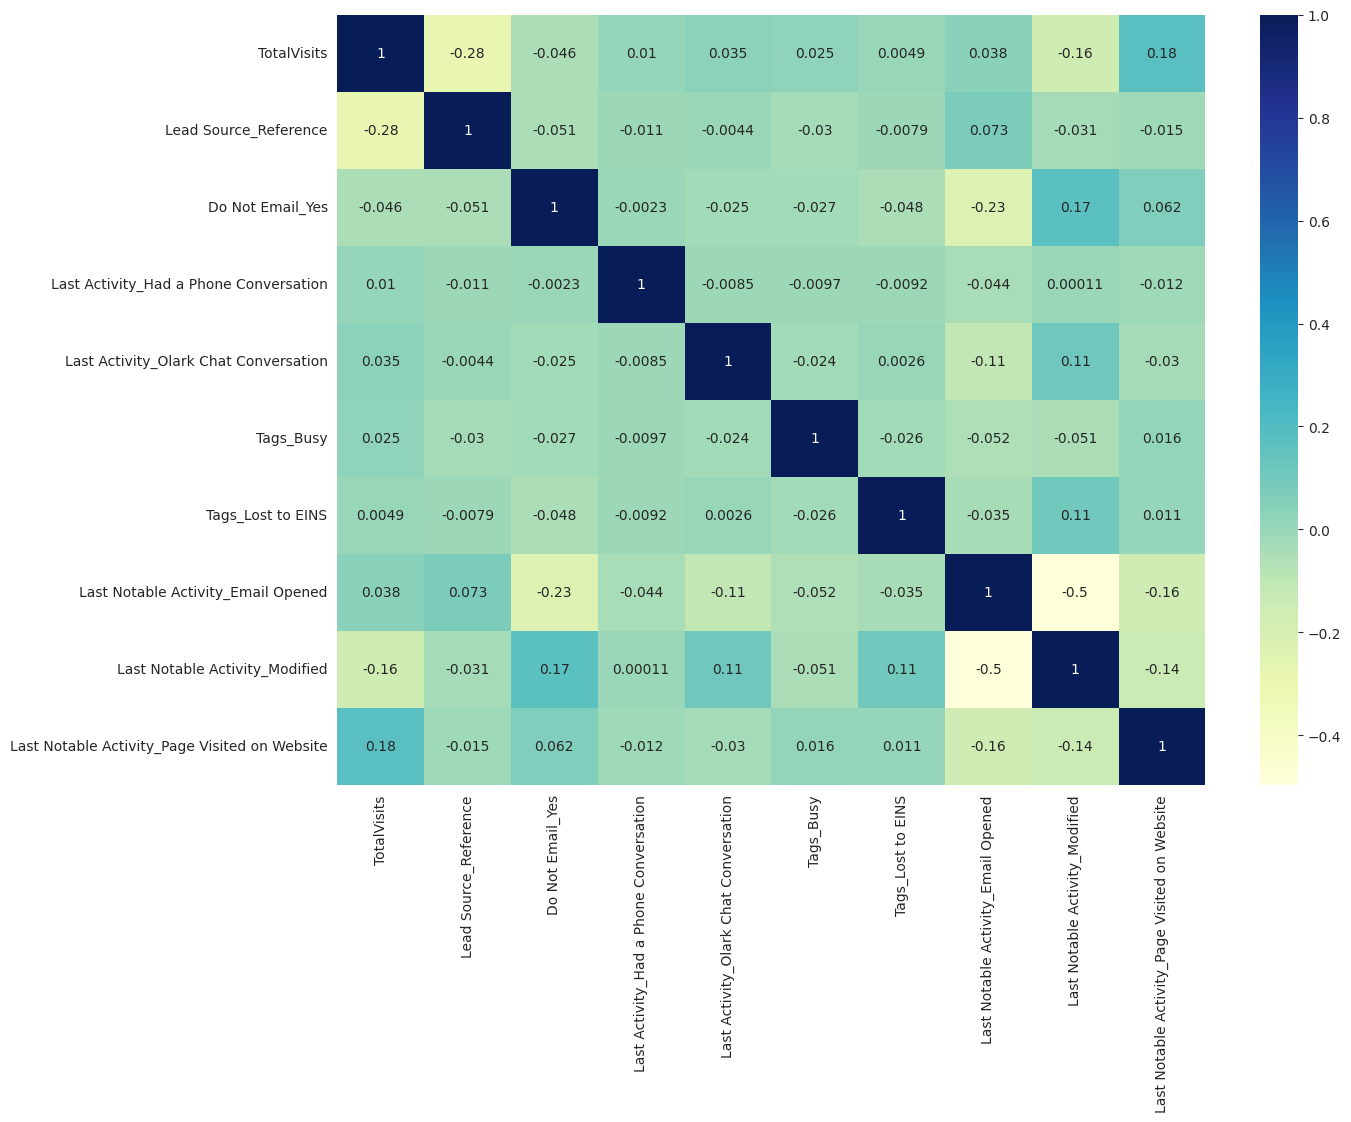

In [529]:
plt.figure(figsize = (14,10))       
sns.heatmap(X_train_v3[rfe_col].corr(),annot = True, cmap="YlGnBu")
plt.show()
#Checking to see if there are any correlation between the features, there are not as expected.

In [530]:
y_train_pred_v1 = mdl_rslt_v3.predict(X_train_v3)
y_train_pred_v2 = pd.DataFrame({'Converted':y_train_v1.values, 'Prediction':y_train_pred_v1.values})
y_train_pred_v2['Lead ID'] = y_train_v1.index
y_train_pred_v2['Converted_Prediction'] = y_train_pred_v2.Prediction.map(lambda x: 1 if x > 0.5 else 0)

In [531]:
#Confusion Matrix of the prediction
metrics.confusion_matrix(y_train_pred_v2.Converted, y_train_pred_v2.Converted_Prediction)

array([[1842,  363],
       [ 709,  814]])

In [532]:
#The prediction in train model is around 79% which is fairly good
metrics.accuracy_score(y_train_pred_v2.Converted, y_train_pred_v2.Converted_Prediction)

0.7124463519313304

In [533]:
#We will now try to find the optimal cutoff point
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_v2[i]= y_train_pred_v2.Converted_Prediction.map(lambda x: 1 if x > i else 0)
y_train_pred_v2.head(20)

,Converted,Prediction,Lead ID,Converted_Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.213514,7813,0,0,0,0,0,0,0,0,0,0,0
1,0,0.384039,8549,0,0,0,0,0,0,0,0,0,0,0
2,0,0.331587,2059,0,0,0,0,0,0,0,0,0,0,0
3,1,0.331587,8745,0,0,0,0,0,0,0,0,0,0,0
4,0,0.366182,530,0,0,0,0,0,0,0,0,0,0,0
5,1,0.298175,2473,0,0,0,0,0,0,0,0,0,0,0
6,0,0.042525,2993,0,0,0,0,0,0,0,0,0,0,0
7,0,0.348685,3799,0,0,0,0,0,0,0,0,0,0,0
8,1,0.420662,188,0,0,0,0,0,0,0,0,0,0,0
9,0,0.226587,2401,0,0,0,0,0,0,0,0,0,0,0


In [534]:
#From the above values we can see the 0.4 is an optimal cutoff point
y_train_pred_v2['Final Prediction'] = y_train_pred_v2.Converted_Prediction.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_v2.head(20)

,Converted,Prediction,Lead ID,Converted_Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final Prediction
0,0,0.213514,7813,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.384039,8549,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.331587,2059,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.331587,8745,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.366182,530,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0.298175,2473,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0.042525,2993,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0.348685,3799,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0.420662,188,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0.226587,2401,0,0,0,0,0,0,0,0,0,0,0,0


In [535]:
#And the test set also has the 78% accuracy rate which is good
metrics.accuracy_score(y_train_pred_v2.Converted, y_train_pred_v2['Final Prediction'])

0.7124463519313304